In [2]:
"""
Created by: Shahd Ahmed
3/23/2024
The program implements Swendsen Wang Algorithm on a 2D lattice
"""
%matplotlib notebook
import matplotlib.animation as animation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import lattice

class SW_algorithm:

    #takes lattice df with random spins 
    def __init__(self, lat, size, T):
        self.lat = lat
        self.size = size
        self.T = T
    def generate_bonds(self):
        """
        The method creates bonds between spins by
        iterating through spins and checking neighbors,
        if the spins are equal, bond is created with a probablity (1 - e^-2J/(k_bT))
        
        @Return: bonds: set of random bond
        """
        j = 1 #coupling coeffecient 
        p = 1 - np.exp(-2*j / self.T) #probability, assuming J = 1
        bonds = set() #create a unique set of bonds
        for i in range (self.size):
            for j in range (self.size):
                if i < self.size - 1 and self.lat.iat[i, j] == self.lat.iat[i + 1, j] and random.random() < p:
                    bonds.add(((i, j), (i + 1, j)))
                if j < self.size - 1 and self.lat.iat[i, j] == self.lat.iat[i, j + 1] and random.random() < p:
                    bonds.add(((i, j), (i, j + 1)))
                            
        return bonds
    
    def identify_cluster(self):

        """
        The method groups connected sites in a cluster
        @Return: clusters array and labels of each cluster
        """
        bonds = self.generate_bonds()
        clusters = []
        for bond in bonds:
            found = False
            for cluster in clusters:
                if bond[0] in cluster or bond[1] in cluster: 
                    #check if the bond is connected to this cluster
                    cluster.update(bond)
                    found = True
                    break
            if not found:
                clusters.append(set(bond)) #make new cluster
        
#         #assign labels for each site
        labels = np.zeros_like(self.lat)
        for i, cluster in enumerate(clusters):
            for point in cluster:
                labels[point] = i

        return clusters, labels
    

            
    def visualizer(self, df_array):
        fps = 30
        nSeconds = 5
        snapshots = df_array

        # First set up the figure, the axis, and the plot element we want to animate
        fig = plt.figure( figsize=(8,8) )

        a = snapshots[0]
        im = plt.imshow(a, interpolation='none', aspect='auto', vmin=0, vmax=1)
        #helper function
        def animate_func(i):
            if i % fps == 0:
                print( '.', end ='' )

            im.set_array(snapshots[i])
            return [im]

        anim = animation.FuncAnimation(
                                       fig, 
                                       animate_func, 
                                       frames = nSeconds * fps,
                                       interval = 1000 / fps, # in ms
                                       )

        anim.save('test_anim.mp4', fps=fps, extra_args=['-vcodec', 'libx264'])

    
    def update_clusters(self, steps):
        """
        The method changes the cluster status and flips the spins consecutively 
        """
        #iterate through clusters, randomly update the sites 
        #pick random cluster
        #change its spins
        #calculate the energy
        df_array = []
        for i in range(steps):
            clusters, labels = self.identify_cluster()
            num_clusters = len(clusters)
            cluster_id = random.randint(0, num_clusters)

            # Create a copy of the DataFrame before appending
            lat_copy = self.lat.copy()

            for i in range(self.size):
                for j in range(self.size):
                    if labels[i, j] == cluster_id:
                        lat_copy.iat[i, j] = -1 * lat_copy.iat[i, j]

            df_array.append(lat_copy)

        self.visualizer(df_array)
        

square_lattice = lattice.Lattice(J = 1)
square_df = square_lattice.get_lattice()
lat = SW_algorithm(square_df, 10, 2)
lat.update_clusters(500)



<IPython.core.display.Javascript object>

MovieWriter ffmpeg unavailable; using Pillow instead.


TypeError: __init__() got an unexpected keyword argument 'extra_args'

<IPython.core.display.Javascript object>


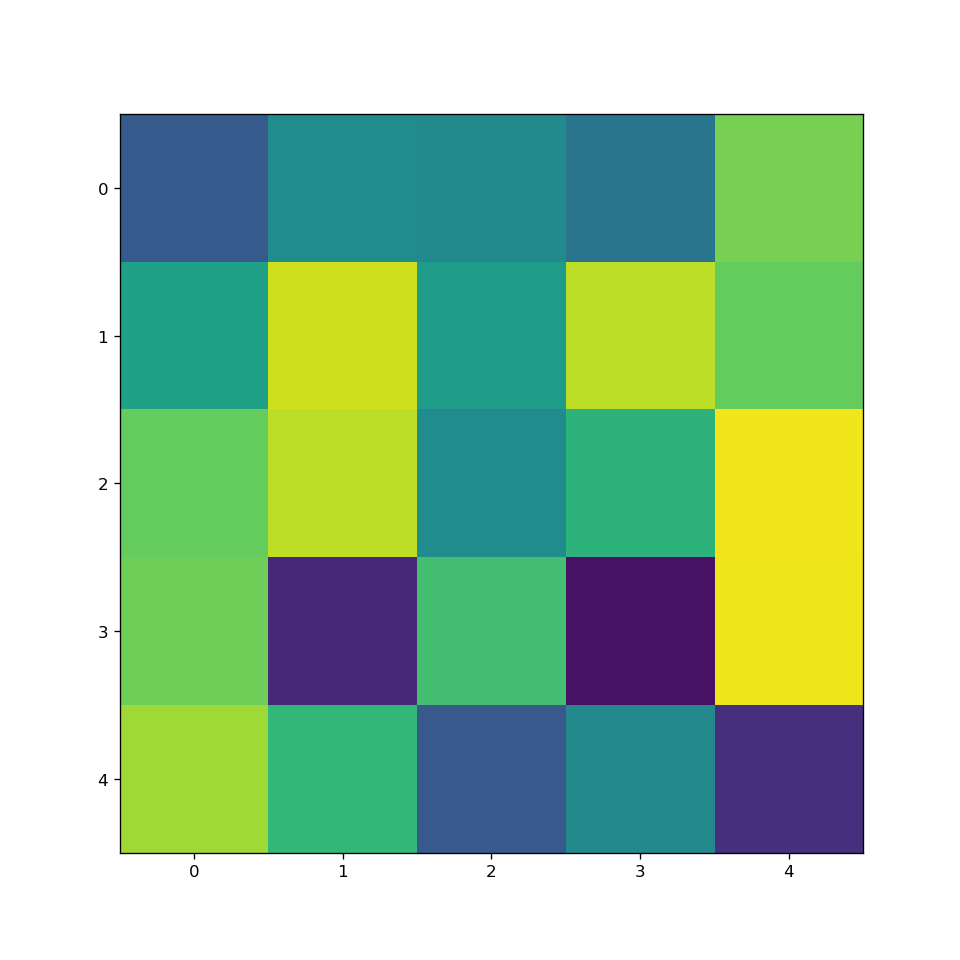

MovieWriter ffmpeg unavailable; using Pillow instead.


TypeError: AbstractMovieWriter.__init__() got an unexpected keyword argument 'extra_args'

In [31]:
%matplotlib notebook

import random
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

import matplotlib.animation as animation


fps = 30
nSeconds = 5
snapshots = [ np.random.rand(5,5) for _ in range( nSeconds * fps ) ]

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure( figsize=(8,8) )

a = snapshots[0]
im = plt.imshow(a, interpolation='none', aspect='auto', vmin=0, vmax=1)

def animate_func(i):
    if i % fps == 0:
        print( '.', end ='' )

    im.set_array(snapshots[i])
    return [im]

anim = animation.FuncAnimation(
                               fig, 
                               animate_func, 
                               frames = nSeconds * fps,
                               interval = 1000 / fps, # in ms
                               )

anim.save('test_anim.mp4', fps=fps, extra_args=['-vcodec', 'libx264'])

print('Done!')